<a href="https://colab.research.google.com/github/raj166/Deep-Learning-Basic-Projects/blob/main/%201.%20Sequential%20class%20fashion%20dataset%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an Image Classifier
First let's install and import TensorFlow and Keras

> conda install tensorflow

> conda install pip 

> pip install --upgrade tensorflow==2.0.0-rc1

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
keras.__version__

'2.5.0'

In [17]:
tf.__version__


'2.5.0'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

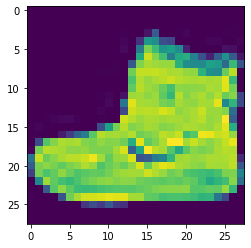

In [19]:
plt.imshow(X_train_full[0])

In [20]:
y_train_full[0]

9

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
class_names[y_train_full[0]]

'Ankle boot'

In [23]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [24]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [25]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [26]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

![](Seq_api.png "Title")

![](Functional.JPG "Title")

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

![](Structure.jpg "Title")

In [29]:
model = keras.models.Sequential()
#Flatten is used to conver 28*28 to 1D array of 785 size 
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#Hidden layers 
# number of 300 neurons and relu activation function
model.add(keras.layers.Dense(300, activation="relu"))
#Hidden layer 2 100 neaurons and activation function relu
model.add(keras.layers.Dense(100, activation="relu"))

#as we have 10 diffret cateogories we will have 10 neaurons and activation function as softmax
model.add(keras.layers.Dense(10, activation="softmax"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


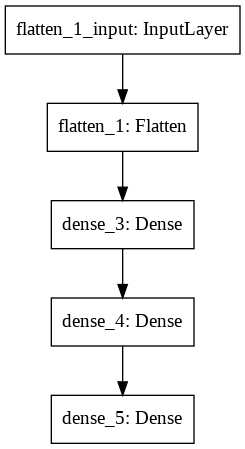

In [32]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [33]:
weights, biases = model.layers[1].get_weights()

In [34]:
weights

array([[ 0.03574536, -0.02389931,  0.01030421, ..., -0.06151724,
        -0.0451347 ,  0.03140047],
       [-0.05467119,  0.04656268, -0.07248728, ..., -0.07038655,
        -0.03083268, -0.06513114],
       [-0.03234808, -0.00317231,  0.04102226, ..., -0.03237895,
         0.01965773, -0.00825518],
       ...,
       [-0.0630435 ,  0.07371157, -0.05752673, ...,  0.07049479,
         0.05577183, -0.02518321],
       [-0.02547856,  0.07304457,  0.04983643, ..., -0.05780029,
         0.07438232, -0.0286764 ],
       [-0.02862201,  0.01245171, -0.04573321, ...,  0.04891213,
        -0.06256616, -0.02975626]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

Documentation - https://keras.io/models/sequential/

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [43]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2245 - accuracy: 0.9190 - val_loss: 0.2912 - val_accuracy: 0.8956
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2211 - accuracy: 0.9205 - val_loss: 0.2902 - val_accuracy: 0.8946
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2173 - accuracy: 0.9222 - val_loss: 0.3680 - val_accuracy: 0.8662
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2140 - accuracy: 0.9242 - val_loss: 0.2975 - val_accuracy: 0.8922
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2122 - accuracy: 0.9233 - val_loss: 0.2872 - val_accuracy: 0.8956
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2064 - accuracy: 0.9259 - val_loss: 0.2963 - val_accuracy: 0.8940
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9276 - val_loss: 0.2921 - val_accuracy:

In [44]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [45]:
model_history.history

{'accuracy': [0.9190000295639038,
  0.9204545617103577,
  0.9221636652946472,
  0.9242181777954102,
  0.9233272671699524,
  0.9259454607963562,
  0.9276000261306763,
  0.9282000064849854,
  0.9284363389015198,
  0.9297817945480347,
  0.9312909245491028,
  0.9325454831123352,
  0.9347636103630066,
  0.9343636631965637,
  0.9351636171340942,
  0.9363272786140442,
  0.9373090863227844,
  0.9394181966781616,
  0.9391636252403259,
  0.9403091073036194,
  0.9413999915122986,
  0.9420909285545349,
  0.9424363374710083,
  0.9430363774299622,
  0.9459454417228699,
  0.9459636211395264,
  0.9469636082649231,
  0.948199987411499,
  0.9481818079948425,
  0.9497454762458801],
 'loss': [0.22448518872261047,
  0.22111652791500092,
  0.21730045974254608,
  0.21402831375598907,
  0.21224775910377502,
  0.20639197528362274,
  0.20396561920642853,
  0.20143257081508636,
  0.197736456990242,
  0.19520916044712067,
  0.1920226812362671,
  0.18794839084148407,
  0.1854679435491562,
  0.18343612551689148,
  

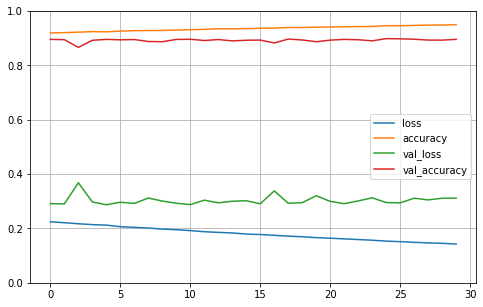

In [46]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8852


[0.3528352677822113, 0.885200023651123]

In [59]:
X_new = X_test[:7]

In [60]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.88, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [63]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, 1, 6, 1, 4])

In [64]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


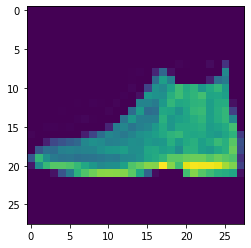

In [53]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


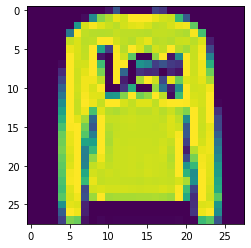

In [54]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


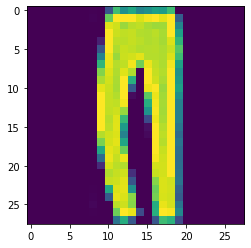

In [55]:
print(plt.imshow(X_test[2]))